# (Loan Data from Prosper)
## by (Amani M. Ali)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df = pd.read_csv(r'C:\Users\DELL LATITUDE\Downloads\prosperLoanData.csv')

###### Explore the original Dataset.

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [11]:
df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [4]:
df['Term']= df['Term'].astype(object)

In [5]:
df2 = df[['ListingKey', 'Term', 'LoanStatus', 'BorrowerRate','LenderYield', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 'StatedMonthlyIncome' , 'LoanOriginalAmount', 'MonthlyLoanPayment','Investors']]

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113937 non-null  object 
 1   Term                 113937 non-null  object 
 2   LoanStatus           113937 non-null  object 
 3   BorrowerRate         113937 non-null  float64
 4   LenderYield          113937 non-null  float64
 5   BorrowerState        108422 non-null  object 
 6   Occupation           110349 non-null  object 
 7   EmploymentStatus     111682 non-null  object 
 8   IsBorrowerHomeowner  113937 non-null  bool   
 9   CurrentlyInGroup     113937 non-null  bool   
 10  IncomeRange          113937 non-null  object 
 11  StatedMonthlyIncome  113937 non-null  float64
 12  LoanOriginalAmount   113937 non-null  int64  
 13  MonthlyLoanPayment   113937 non-null  float64
 14  Investors            113937 non-null  int64  
dtypes: bool(2), float

### What is the structure of your dataset?

> A new dataset with the variables of interest has been created. It contains 15 variables.

### What is/are the main feature(s) of interest in your dataset?

> I would like to shed some light on the borrower's charachteristics and how this can affect the properties of the loan borrowed. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The incorporation of borrower charachteristics such as occupation, monthly income, state, employment status and being a homeowner or in a group.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### 1. Term:

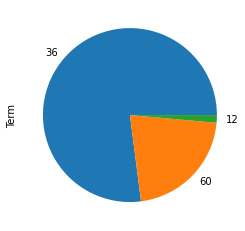

In [15]:
df2['Term'].value_counts().plot(kind='pie')

#### The term for the majority of the loans is 36 months.

#### 2. Loan Status:

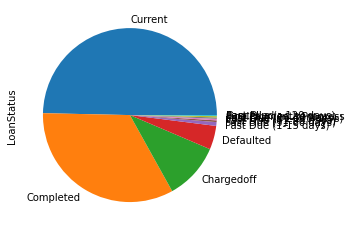

In [16]:
df2['LoanStatus'].value_counts().plot(kind='pie')

#### The majority of the loans are current ones.

#### 3. Borrower rate:

Text(0, 0.5, 'Count')

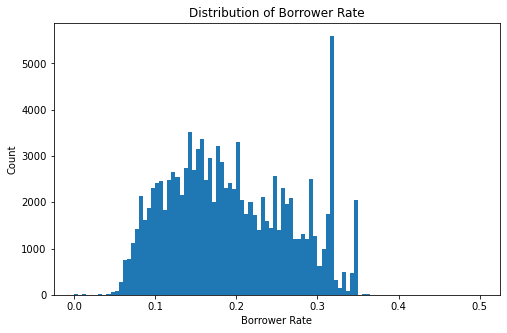

In [18]:
binsize = 0.005
bins = np.arange(0, df2.BorrowerRate.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'BorrowerRate', bins = bins);
plt.title('Distribution of Borrower Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Count')

#### The distribution for the borrower rate appears to be normal except for a  peak at around 0.34 which cooresponds to more than 5K of tha loans.

#### 4. Lender Yield:

Text(0, 0.5, 'Count')

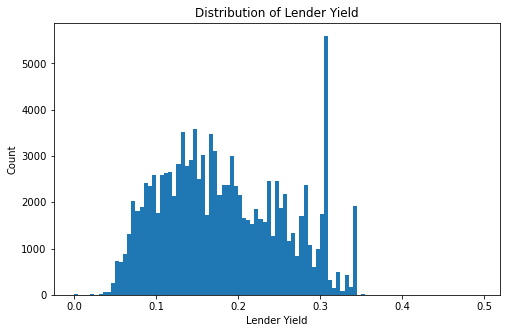

In [6]:
binsize = 0.005
bins = np.arange(0, df2.LenderYield.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'LenderYield', bins = bins);
plt.title('Distribution of Lender Yield')
plt.xlabel('Lender Yield')
plt.ylabel('Count')

#### As expected, the same shape of the distribution as the borrower rate, but here the peak is at a slightly lower range that the rate and this can be explained by the subtraction of the fees. 

#### 5. Borrower State , Occupation and Employment Status :

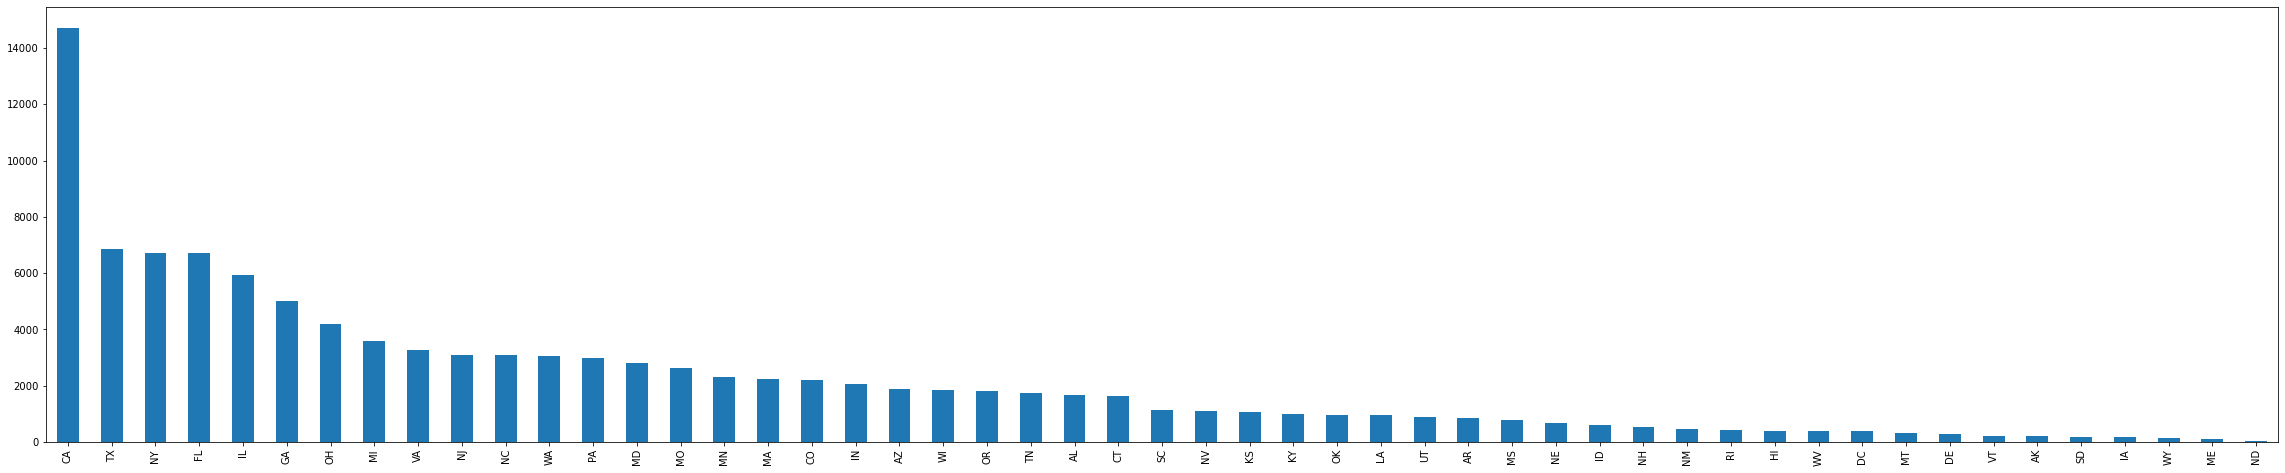

In [23]:
df2['BorrowerState'].value_counts().plot(kind='bar', figsize=(40,8));

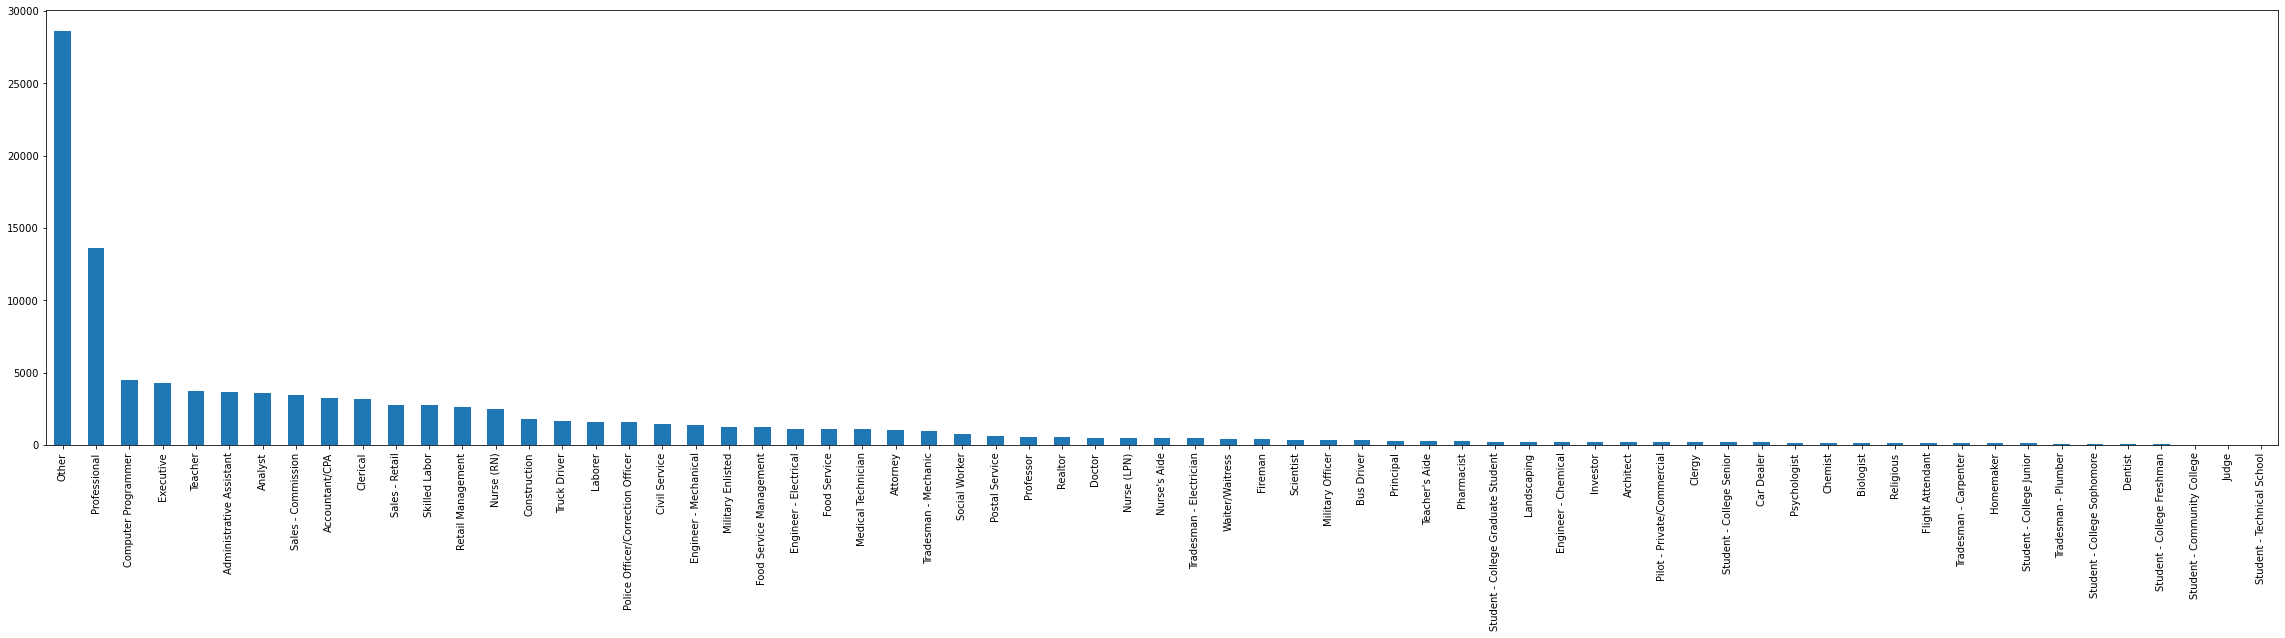

In [24]:
df2['Occupation'].value_counts().plot(kind='bar', figsize=(40,8));

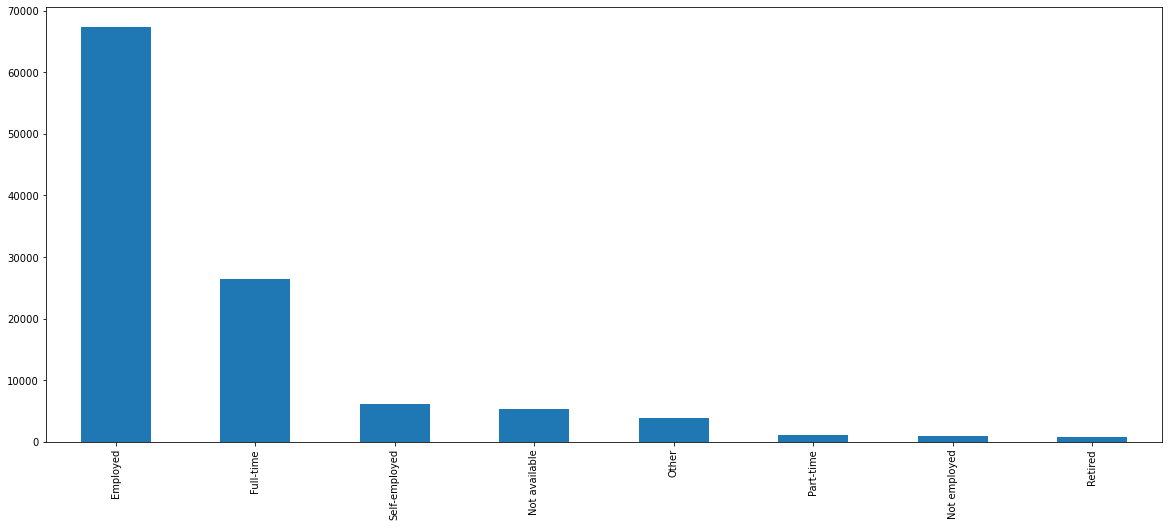

In [25]:
df2['EmploymentStatus'].value_counts().plot(kind='bar', figsize=(20,8));

#### The majority of the borrowers are from California and are professional workers and are employed.

#### 6. Home Ownership and being in a group:

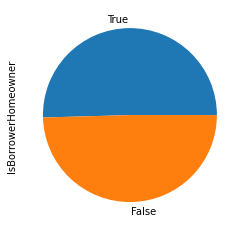

In [28]:
df2['IsBorrowerHomeowner'].value_counts().plot(kind='pie')

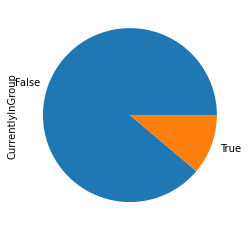

In [29]:
df2['CurrentlyInGroup'].value_counts().plot(kind='pie')

#### The majority of the borrowers are homeowners and are not a part of a group.

#### 7. Income Range:

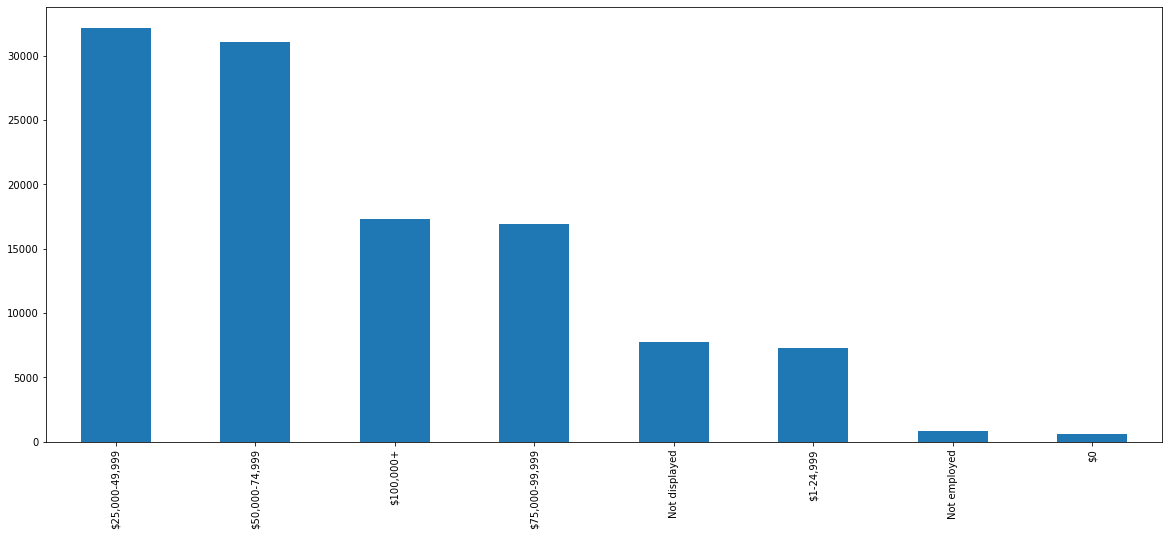

In [30]:
df2['IncomeRange'].value_counts().plot(kind='bar', figsize=(20,8));

#### Most of the borrowers have an income ranging from 25k to 75k dollars.

#### 8. Stated Monthly Income:

Text(0, 0.5, 'Count')

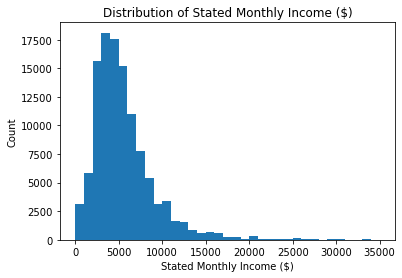

In [7]:
income_bins = np.arange(df2.StatedMonthlyIncome.min(), df2.LoanOriginalAmount.max()+1e3, 1e3)

plt.hist(data=df2, x='StatedMonthlyIncome', bins=income_bins);
plt.xlabel('Stated Monthly Income ($)');
plt.title('Distribution of Stated Monthly Income ($)')
plt.ylabel('Count')

In [42]:
df2.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

#### The distribution for the monthly income is right skewed with a mean of 5.6 K dollars.

#### 9. Loan Original amount:

Text(0, 0.5, 'Count')

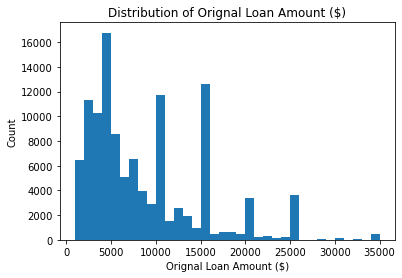

In [8]:
amount_bins = np.arange(df2.LoanOriginalAmount.min(), df2.LoanOriginalAmount.max()+1e3, 1e3)

plt.hist(data=df2, x='LoanOriginalAmount', bins=amount_bins);
plt.xlabel('Orignal Loan Amount ($)');
plt.title('Distribution of Orignal Loan Amount ($)')
plt.ylabel('Count')

#### The distribution is right skewed with the majority of the loans having an amount around 5 thousand dollars.

#### 10. Loan Monthly Payment:

Text(0, 0.5, 'Count')

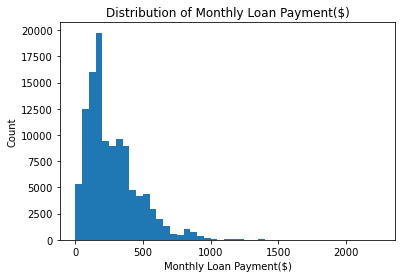

In [9]:
monthly_bins = np.arange(df2.MonthlyLoanPayment.min(), df2.MonthlyLoanPayment.max(), 50)

plt.hist(data=df2, x='MonthlyLoanPayment', bins=monthly_bins);
plt.xlabel('Monthly Loan Payment($)');
plt.title('Distribution of Monthly Loan Payment($)')
plt.ylabel('Count')

#### 11. Investors:

In [47]:
df2.Investors.value_counts()

1      27814
2       1386
3        991
4        827
5        753
       ...  
881        1
801        1
752        1
715        1
831        1
Name: Investors, Length: 751, dtype: int64

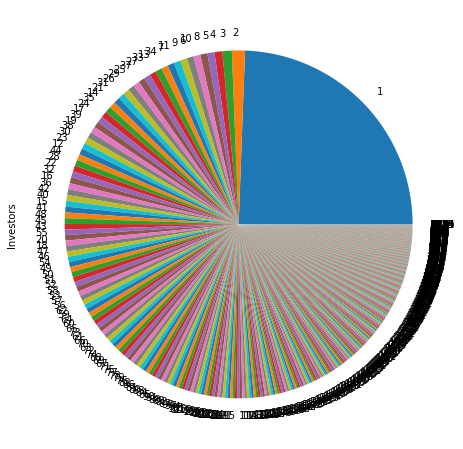

In [49]:
df2['Investors'].value_counts().plot(kind='pie', figsize=(20,8));

In [50]:
df2.Investors.describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

#### The majority of the loans have only one investor and the number of investors range from 1 to 1189 investors.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the loans have a term of 60 months, a current status, a rate ranging from 0.1 to o.2, and an amont of around 4k dollars. Most borrowers came from California, are professional workers, employed, homeowners and not a part of a group. The most frequent Income ranges were from 25k to 75k. The number of investors in loans ranged from 1 to 1189 investors with the majority of the loans having only one investor.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the Loan original amount was multimodal with several peaks at 4k, 10k, 15k, 20 k and 25 k.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [11]:
cont_vars = ['BorrowerRate','LenderYield','LoanOriginalAmount','StatedMonthlyIncome','MonthlyLoanPayment', 'Investors']

categoric_vars = ['Term', 'LoanStatus', 'BorrowerState', 'EmploymentStatus', 'IncomeRange']

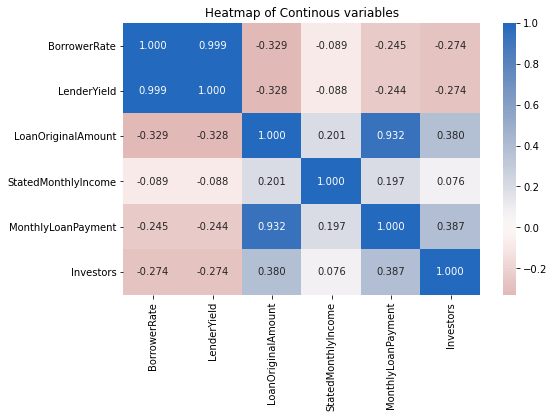

In [12]:
plt.figure(figsize = [8, 5])
sb.heatmap(df2[cont_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Heatmap of Continous variables');

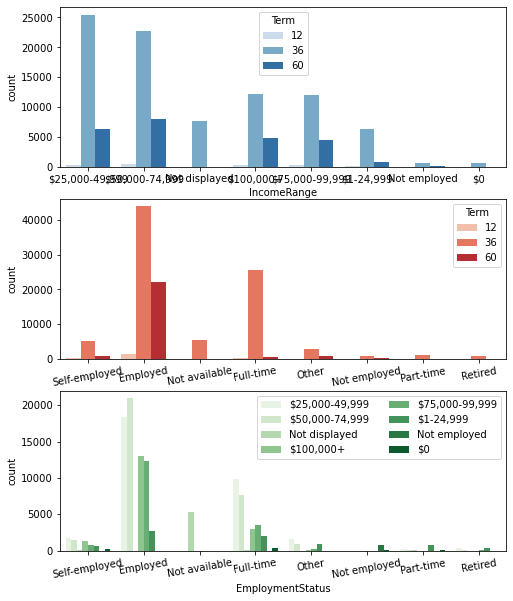

In [67]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = df2, x = 'IncomeRange', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df2, x = 'EmploymentStatus', hue = 'Term', palette = 'Reds')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df2, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

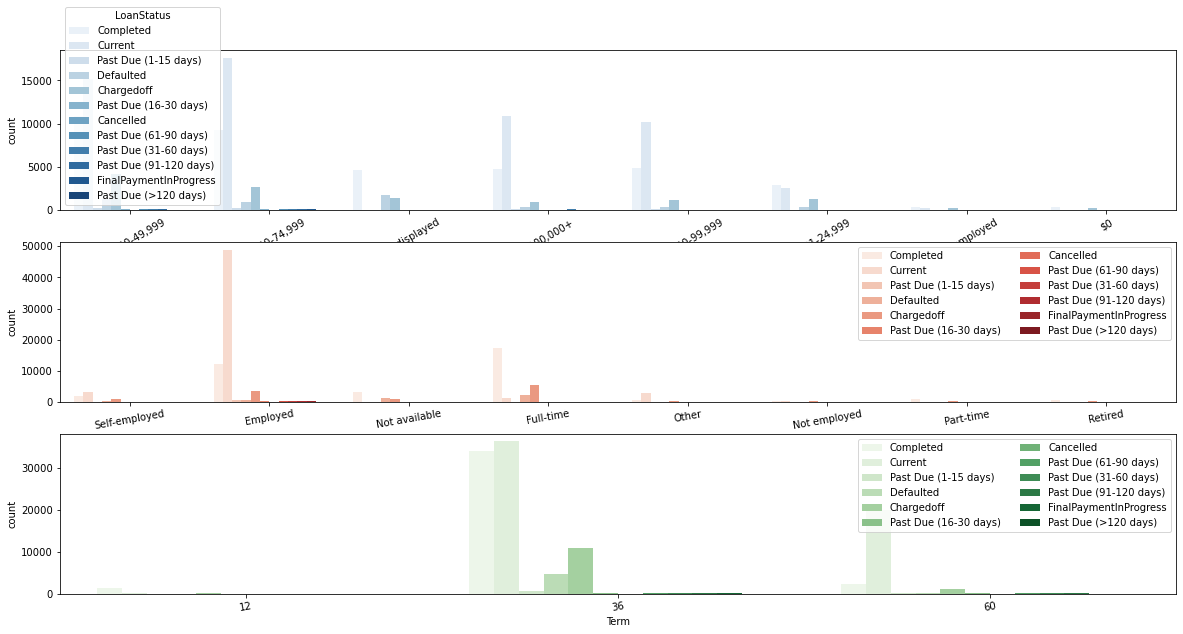

In [66]:
plt.figure(figsize = [20, 10])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = df2, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Blues')
ax.legend(loc = 1, ncol = 4);
plt.xticks(rotation=30)

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df2, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Reds')
ax.legend(loc = 1, ncol = 2);
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df2, x = 'Term', hue = 'LoanStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

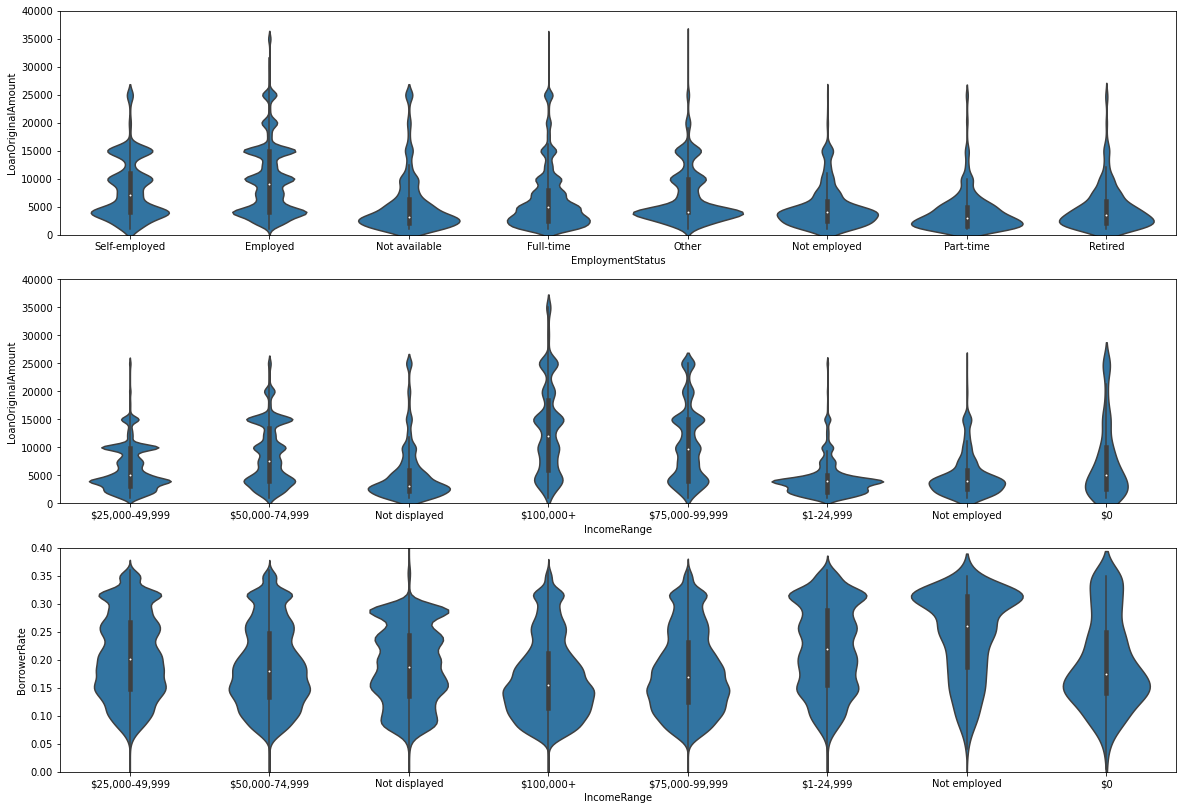

In [72]:
plt.figure(figsize=[20,14])
plt.subplot(3,1,1)
sb.violinplot(data=df, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color);
plt.ylim((0,40000));

plt.subplot(3,1,2)
sb.violinplot(data=df, x='IncomeRange', y='LoanOriginalAmount', color=base_color);
plt.ylim((0,40000));

plt.subplot(3,1,3)
sb.violinplot(data=df, x='IncomeRange', y='BorrowerRate', color=base_color);
plt.ylim((0,0.4));

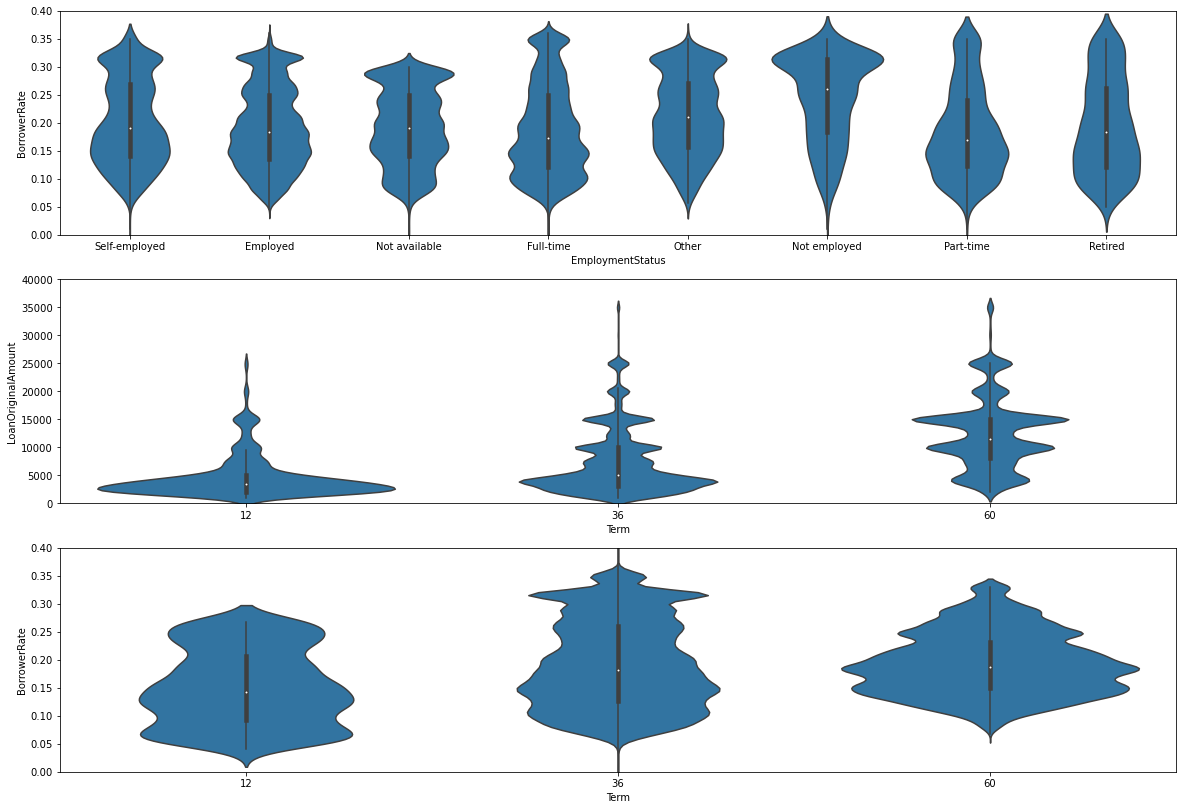

In [73]:
plt.figure(figsize=[20,14])
plt.subplot(3,1,1)
sb.violinplot(data=df, x='EmploymentStatus', y='BorrowerRate', color=base_color);
plt.ylim((0,0.4));

plt.subplot(3,1,2)
sb.violinplot(data=df, x='Term', y='LoanOriginalAmount', color=base_color);
plt.ylim((0,40000));

plt.subplot(3,1,3)
sb.violinplot(data=df, x='Term', y='BorrowerRate', color=base_color);
plt.ylim((0,0.4));

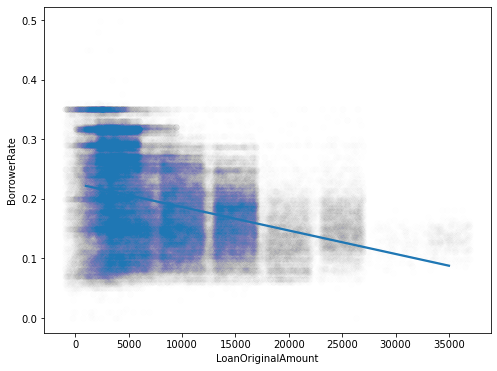

In [16]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df2, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.002}, x_jitter = 2000);

In [83]:
df2.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

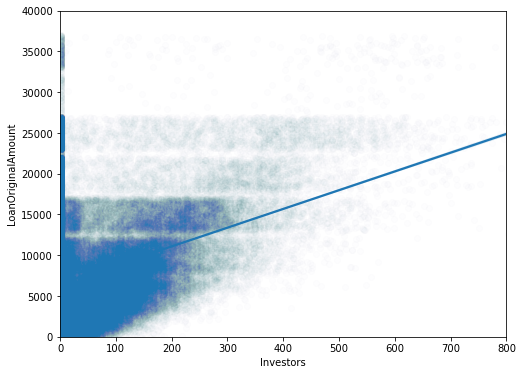

In [18]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df2, x = 'Investors', y = 'LoanOriginalAmount', scatter_kws={'alpha':0.008}, y_jitter = 2000);
plt.xlim(0,800);
plt.ylim(0,40000);

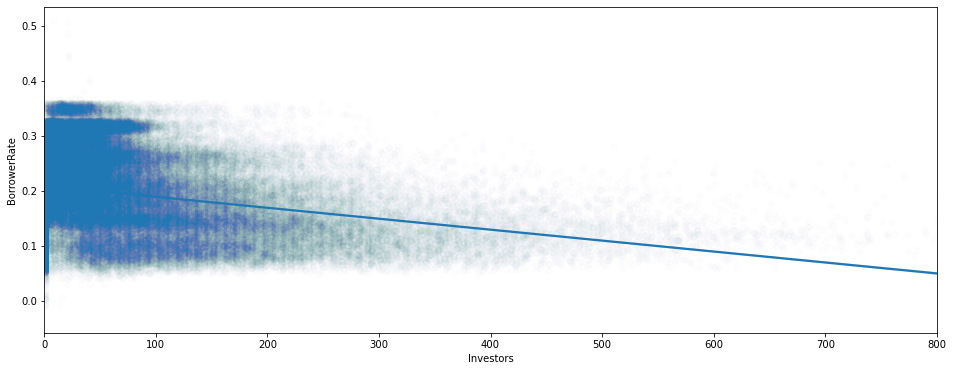

In [21]:
plt.figure(figsize = [16, 6])
sb.regplot(data = df2, x = 'Investors', y = 'BorrowerRate', scatter_kws={'alpha':0.008}, y_jitter = 0.01);
plt.xlim(0,800);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The heatmap and regression plots showed negative relationships between loan original amount and borrower rate and between the number of the investors and borrower rate. on the other side, the relationship between the number of investors and loan original amount was postive.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The majority of the loans' status for employed borrowers were current, while those for full-time borrowers were completed. Also, the relatioship between the Term of the loan and its amount was interesting, where the majority of the 12-month loans had an amount of around 5k dollars while 36-month loans had several peaks, the greatest was at around 18k dollars.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

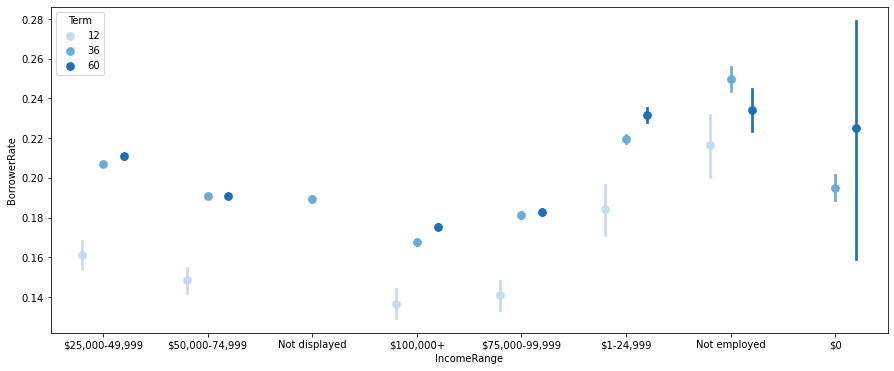

In [85]:
fig = plt.figure(figsize=[15,6])

ax = sb.pointplot(data=df2, x='IncomeRange', y='BorrowerRate', hue='Term',
                  dodge=0.4, linestyles='', palette='Blues');

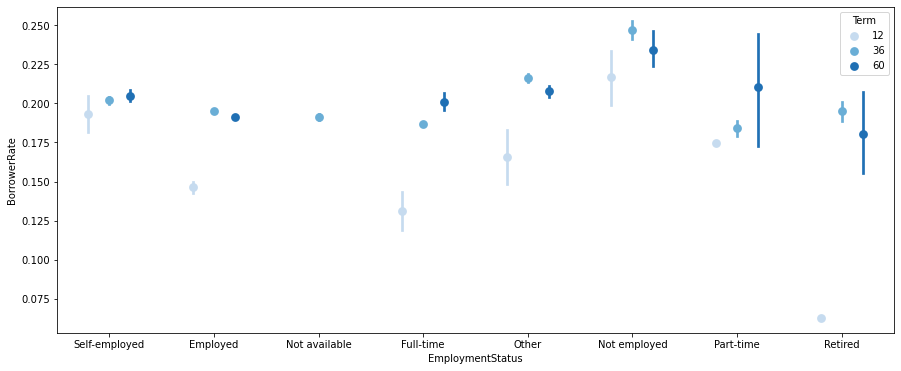

In [86]:
fig = plt.figure(figsize=[15,6])

ax = sb.pointplot(data=df2, x='EmploymentStatus', y='BorrowerRate', hue='Term',
                  dodge=0.4, linestyles='', palette='Blues');

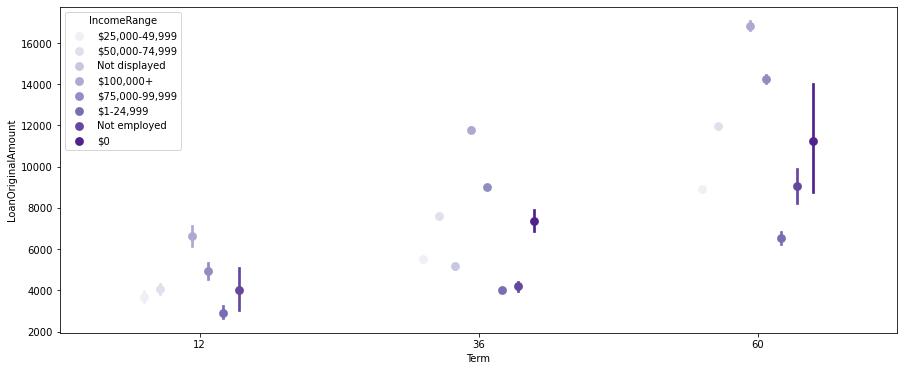

In [101]:
fig = plt.figure(figsize=[15,6])

ax = sb.pointplot(data=df2, x='Term', y='LoanOriginalAmount', hue='IncomeRange',
                  dodge=0.4, linestyles='', palette='Purples');

In [123]:
df2.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

Text(0, 0.5, 'MonthlyLoanPayment')

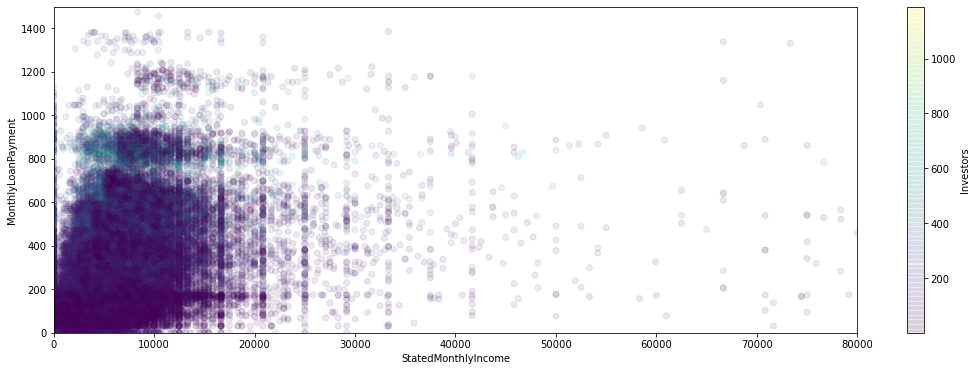

In [27]:
plt.figure(figsize = [18,6])
plt.scatter(data = df2, x = 'StatedMonthlyIncome', y = 'MonthlyLoanPayment',
                c = 'Investors', alpha = 0.1)
plt.colorbar(label = 'Investors')
plt.xlim(0,80000)
plt.ylim(0,1500)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('MonthlyLoanPayment')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There was postive correlation between term and the loan original amount.

### Were there any interesting or surprising interactions between features?

> Although most of the borrowers income range was from 25 to 75k dollars, the major income range for 12 month borrowers was 75 to 100k dollars while for 36 and 60 month loans, the major income range was more than 100k dollars.